In [2]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [5]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [6]:
tf.keras.backend.clear_session()

In [7]:
subject = 'Distrito_Federal - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [8]:
data = pd.read_csv('2003_raw_Distrito_Federal_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Distrito_Federal - PIB - Per Capita,Distrito_Federal - PIB - Preços de Mercado,Distrito_Federal - PIB - Estadual,Distrito_Federal - PIB - Construção Civil,Distrito_Federal - População,Distrito_Federal - INCC (%),Distrito_Federal - IPCA - Variação mensal durante o Plano Real (%),Distrito_Federal - IGP-DI,Distrito_Federal - Taxa Selic (%),Distrito_Federal - IDH - Longevidade,Distrito_Federal - IDH - Renda,Distrito_Federal - IDH - Educação,Distrito_Federal - NFSP - Fluxo Mensal (Milhões de reais),Distrito_Federal - Estoque liquido de capital fixo - (R$),Distrito_Federal - Desemprego,Distrito_Federal - Produção de Cimento (t),Distrito_Federal - Valor,Distrito_Federal - Consumo de Cimento (t)
0,2003-01-01,7.436859e+06,3.914660e+06,3.465712,4.945861e+06,2145839.0,1.70,12.53,2.70,0.082293,0.814,0.805,0.582,3.46,6.098524e+06,14.215385,NaN,0.3200,50047.0
1,2003-02-01,7.436859e+06,3.914660e+06,3.465712,4.945861e+06,2145839.0,1.51,2.25,2.17,0.088771,0.814,0.805,0.582,3.59,6.172460e+06,14.215385,NaN,0.3300,48110.0
2,2003-03-01,7.436859e+06,3.914660e+06,3.465712,4.945861e+06,2145839.0,1.39,3.86,1.59,0.090733,0.814,0.805,0.582,3.84,6.172460e+06,14.215385,NaN,0.3300,49006.0
3,2003-04-01,7.436859e+06,3.914660e+06,3.465712,4.945861e+06,2145839.0,1.38,5.13,1.66,0.092749,0.814,0.805,0.582,3.95,6.172460e+06,14.215385,115612.0,0.3200,48445.0
4,2003-05-01,7.436859e+06,3.914660e+06,3.465712,4.945861e+06,2145839.0,0.90,6.15,0.41,0.092758,0.814,0.805,0.582,4.06,6.172460e+06,14.215385,94729.0,0.3200,51436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,1.116771e+07,1.884374e+07,3.754225,2.886710e+06,2974703.0,0.58,2.42,-0.01,0.024620,0.890,0.860,0.800,0.69,7.827728e+06,12.300000,204627.0,0.3560,64127.0
200,2019-09-01,1.116771e+07,1.884374e+07,3.754225,2.886710e+06,2974703.0,0.42,2.54,-0.51,0.022751,0.890,0.860,0.800,0.62,7.827728e+06,12.000000,26141.0,0.3780,60822.0
201,2019-10-01,1.116771e+07,1.884374e+07,3.754225,2.886710e+06,2974703.0,0.46,2.49,0.50,0.022035,0.890,0.860,0.800,0.59,7.827728e+06,11.900000,297916.0,0.3660,65182.0
202,2019-11-01,1.116771e+07,1.884374e+07,3.754225,2.886710e+06,2974703.0,0.18,2.60,0.55,0.020790,0.890,0.860,0.800,0.57,7.827728e+06,11.700000,112479.0,0.3604,51282.0


In [9]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      62.294
1      55.247
2      65.908
3      67.387
4      68.730
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Distrito_Federal - Consumo de Cimento (t), Length: 204, dtype: float64

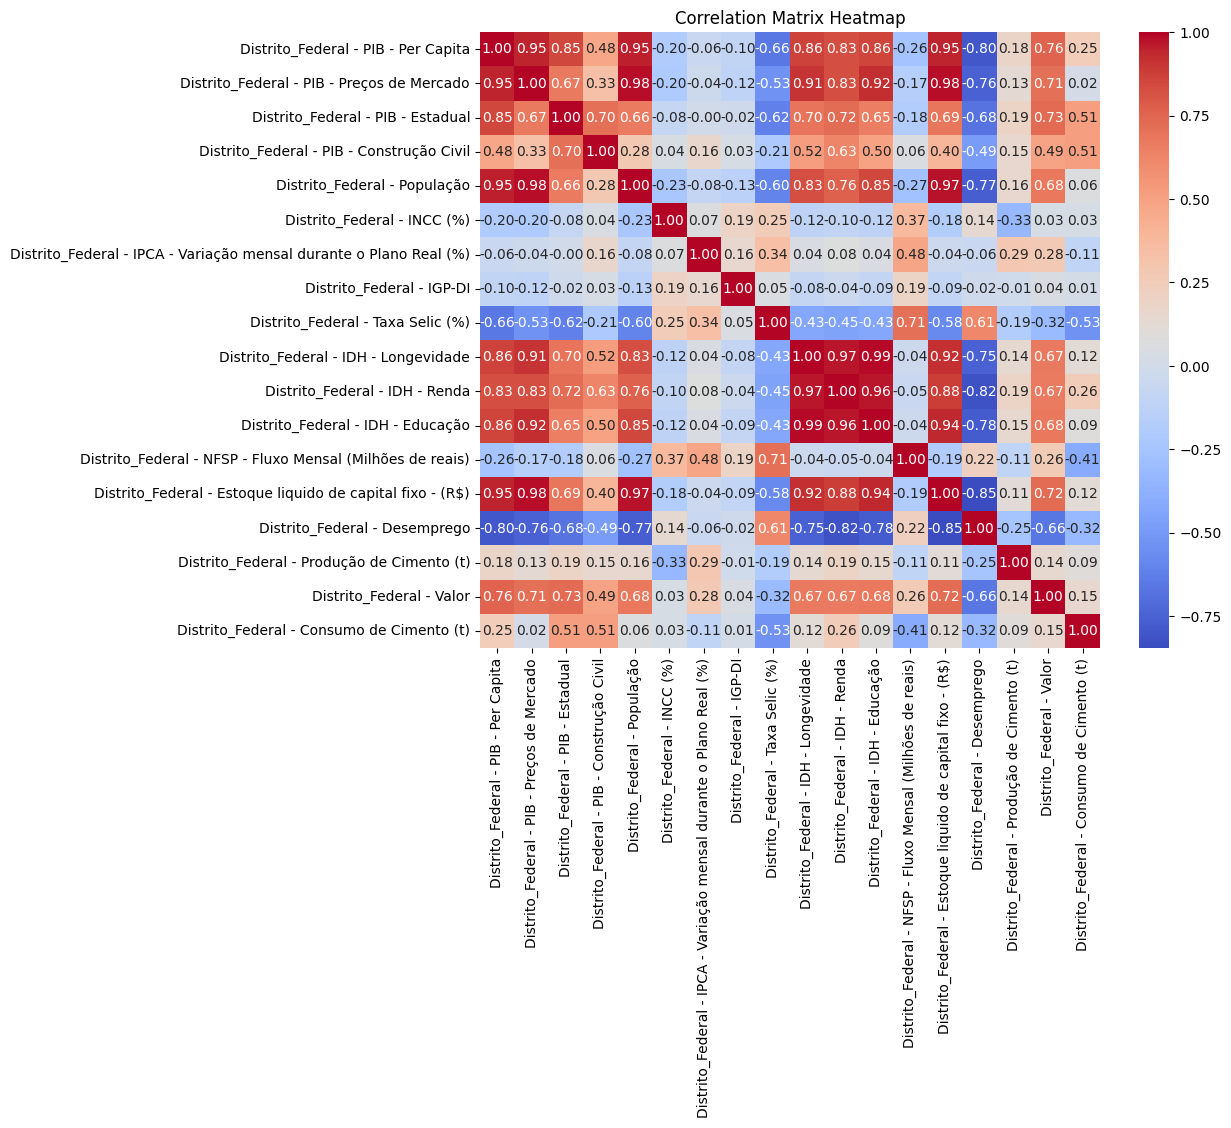

In [10]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [11]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
# scaler=MinMaxScaler()
# scaled_data = scaler.fit_transform(input_data)
# input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Distrito_Federal - PIB - Per Capita,Distrito_Federal - PIB - Preços de Mercado,Distrito_Federal - PIB - Estadual,Distrito_Federal - PIB - Construção Civil,Distrito_Federal - População,Distrito_Federal - INCC (%),Distrito_Federal - IPCA - Variação mensal durante o Plano Real (%),Distrito_Federal - IGP-DI,Distrito_Federal - Taxa Selic (%),Distrito_Federal - IDH - Longevidade,Distrito_Federal - IDH - Renda,Distrito_Federal - IDH - Educação,Distrito_Federal - NFSP - Fluxo Mensal (Milhões de reais),Distrito_Federal - Estoque liquido de capital fixo - (R$),Distrito_Federal - Desemprego,Distrito_Federal - Produção de Cimento (t),Distrito_Federal - Valor
0,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.998868,4.052332,3.466715,2.303195,-0.925473,-0.92971,-0.919940,3.108599,-1.539424,1.294966,-1.000000,0.586366
1,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.647487,-0.596188,2.630940,2.745235,-0.925473,-0.92971,-0.919940,3.275709,-1.411460,1.294966,-1.000000,0.771320
2,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.425561,0.131839,1.716318,2.879123,-0.925473,-0.92971,-0.919940,3.597074,-1.411460,1.294966,-1.000000,0.771320
3,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.407068,0.706121,1.826703,3.016721,-0.925473,-0.92971,-0.919940,3.738475,-1.411460,1.294966,-0.302152,0.586366
4,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,0.519367,1.167355,-0.144465,3.017322,-0.925473,-0.92971,-0.919940,3.879875,-1.411460,1.294966,-0.431407,0.586366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.376357,1.909322,0.455807,-0.585009,1.698021,-0.590259,-0.966985,-1.264088,-0.729479,1.483292,0.66712,1.477275,-0.374997,1.441346,0.395147,0.193069,0.845302
176,1.376357,1.909322,0.455807,-0.585009,1.698021,-0.479297,-0.881068,-0.412544,-0.941281,1.483292,0.66712,1.477275,-0.439270,1.441346,0.395147,-0.822377,0.715834
177,1.376357,1.909322,0.455807,-0.585009,1.698021,-1.034110,-0.808718,0.186692,-1.140710,1.483292,0.66712,1.477275,-0.503543,1.441346,0.395147,-0.085966,0.734330
178,1.376357,1.909322,0.455807,-0.585009,1.698021,-0.571766,-0.614276,-0.633314,-1.226481,1.483292,0.66712,1.477275,-0.503543,1.441346,0.434009,-0.344983,0.723232


In [12]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Distrito_Federal - PIB - Per Capita,Distrito_Federal - PIB - Preços de Mercado,Distrito_Federal - PIB - Estadual,Distrito_Federal - PIB - Construção Civil,Distrito_Federal - População,Distrito_Federal - INCC (%),Distrito_Federal - IPCA - Variação mensal durante o Plano Real (%),Distrito_Federal - IGP-DI,Distrito_Federal - Taxa Selic (%),Distrito_Federal - IDH - Longevidade,Distrito_Federal - IDH - Renda,Distrito_Federal - IDH - Educação,Distrito_Federal - NFSP - Fluxo Mensal (Milhões de reais),Distrito_Federal - Estoque liquido de capital fixo - (R$),Distrito_Federal - Desemprego,Distrito_Federal - Produção de Cimento (t),Distrito_Federal - Valor
0,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.998868,4.052332,3.466715,2.303195,-0.925473,-0.929710,-0.919940,3.108599,-1.539424,1.294966,-1.000000,0.586366
1,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.647487,-0.596188,2.630940,2.745235,-0.925473,-0.929710,-0.919940,3.275709,-1.411460,1.294966,-1.000000,0.771320
2,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.425561,0.131839,1.716318,2.879123,-0.925473,-0.929710,-0.919940,3.597074,-1.411460,1.294966,-1.000000,0.771320
3,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,1.407068,0.706121,1.826703,3.016721,-0.925473,-0.929710,-0.919940,3.738475,-1.411460,1.294966,-0.302152,0.586366
4,-1.363709,-1.320690,-0.550375,0.699472,-1.641502,0.519367,1.167355,-0.144465,3.017322,-0.925473,-0.929710,-0.919940,3.879875,-1.411460,1.294966,-0.431407,0.586366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1.167728,1.502064,0.393595,-0.432922,1.447425,-0.238878,0.629248,-1.406012,0.272188,1.166349,1.128426,1.175106,0.794771,1.416222,-0.770732,-1.000000,0.752825
164,1.167728,1.502064,0.393595,-0.432922,1.447425,-0.608753,0.837256,-0.112926,0.272188,1.166349,1.128426,1.175106,0.730498,1.416222,-0.731869,-1.000000,0.586366
165,1.167728,1.502064,0.393595,-0.432922,1.447425,-0.534778,0.877953,-0.743700,0.272188,1.166349,1.128426,1.175106,0.743353,1.416222,-0.693007,-1.000000,0.793515
166,1.167728,1.502064,0.393595,-0.432922,1.447425,-0.756703,1.000045,-0.586006,0.248413,1.166349,1.128426,1.175106,0.614807,1.416222,-0.693007,-1.000000,0.971071


In [13]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      62.294
1      55.247
2      65.908
3      67.387
4      68.730
        ...  
163    58.854
164    53.940
165    51.514
166    42.635
167    40.371
Name: Distrito_Federal - Consumo de Cimento (t), Length: 168, dtype: float64

In [14]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [15]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [16]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Distrito_Federal - PIB - Per Capita,Distrito_Federal - PIB - Preços de Mercado,Distrito_Federal - PIB - Estadual,Distrito_Federal - PIB - Construção Civil,Distrito_Federal - População,Distrito_Federal - INCC (%),Distrito_Federal - IPCA - Variação mensal durante o Plano Real (%),Distrito_Federal - IGP-DI,Distrito_Federal - Taxa Selic (%),Distrito_Federal - IDH - Longevidade,Distrito_Federal - IDH - Renda,Distrito_Federal - IDH - Educação,Distrito_Federal - NFSP - Fluxo Mensal (Milhões de reais),Distrito_Federal - Estoque liquido de capital fixo - (R$),Distrito_Federal - Desemprego,Distrito_Federal - Produção de Cimento (t),Distrito_Federal - Valor
132,0.656034,0.782971,0.045929,0.791968,0.945041,-0.960135,1.058830,0.297077,-0.755853,0.849407,1.128426,1.175106,-0.285015,0.834026,-1.392534,3.994431,0.641853
133,0.656034,0.782971,0.045929,0.791968,0.945041,0.482379,-1.364912,-0.160234,-0.688658,0.849407,1.128426,1.175106,-0.349288,1.129318,-1.198221,-1.000000,0.697339
134,0.656034,0.782971,0.045929,0.791968,0.945041,-0.534778,-1.052901,0.549386,-0.626634,0.849407,1.128426,1.175106,-0.374997,1.129318,-1.081633,-1.000000,0.641853
135,0.656034,0.782971,0.045929,0.791968,0.945041,-0.627247,-0.627842,1.542855,-0.571481,0.849407,1.128426,1.175106,-0.259306,1.129318,-1.159358,-0.061356,0.549375
136,0.656034,0.782971,0.045929,0.791968,0.945041,0.482379,-0.320352,-0.081387,-0.516512,0.849407,1.128426,1.175106,-0.053632,1.129318,-1.237083,-1.000000,0.586366
137,0.656034,0.782971,0.045929,0.791968,0.945041,2.646150,-0.107822,-1.500628,-0.510405,0.849407,1.128426,1.175106,0.023495,1.129318,-1.314809,-1.000000,0.708436
138,0.656034,0.782971,0.045929,0.791968,0.945041,0.075516,0.082098,-1.784477,-0.510405,0.849407,1.128426,1.175106,-0.002214,1.129318,-1.353671,-1.000000,0.919284
139,0.656034,0.782971,0.045929,0.791968,0.945041,0.241960,0.086620,-1.658322,-0.510405,0.849407,1.128426,1.175106,-0.143614,1.129318,-1.431396,0.222568,0.919284
140,0.656034,0.782971,0.045929,0.791968,0.945041,-0.997122,0.204189,-0.696392,-0.510054,0.849407,1.128426,1.175106,-0.182178,1.129318,-1.509122,-1.000000,0.919284
141,0.656034,0.782971,0.045929,0.791968,0.945041,-0.867666,0.470982,-0.759469,-0.510405,0.849407,1.128426,1.175106,-0.105051,1.129318,-1.586847,-1.000000,0.919284


In [17]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [18]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(72, activation='tanh', 
                             return_sequences=True,
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(36, activation='tanh', 
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [18]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [19]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [22]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [23]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[658872551, 96274501, 2313589738, 1152459520, 1039124659, 3292564654, 3290726934, 2902198845, 4065225690, 3161791252]


Step: 0 ___________________________________________
val_loss: 34.52973556518555
winner_seed: 658872551


Step: 1 ___________________________________________
val_loss: 34.56321334838867


Step: 2 ___________________________________________
val_loss: 32.166385650634766
winner_seed: 2313589738


Step: 3 ___________________________________________
val_loss: 66.03173828125


Step: 4 ___________________________________________
val_loss: 24.130176544189453
winner_seed: 1039124659


Step: 5 ___________________________________________
val_loss: 48.14368438720703


Step: 6 ___________________________________________
val_loss: 34.11015701293945


Step: 7 ___________________________________________
val_loss: 30.92496109008789


Step: 8 ___________________________________________
val_loss: 31.056060791015625


Step: 9 ___________________________________________
val_loss: 34.372028

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,43.132607,41.531822,42.516678,45.431057,45.616135,44.703743,48.627865,53.230461,51.738689,52.579964,51.983833,52.49155
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,5.857395,3.19418,1.974323,1.530056,9.402866,6.238258,15.364136,10.896538,9.083309,12.602036,0.701832,8.93755


[3400423784, 1048769308, 1480870262, 282253031, 3737884093, 2824833270, 2507059273, 3907177682, 870637628, 2892089822]


Step: 0 ___________________________________________
val_loss: 38.6424560546875
winner_seed: 3400423784


Step: 1 ___________________________________________
val_loss: 41.87290954589844


Step: 2 ___________________________________________
val_loss: 32.52978515625
winner_seed: 1480870262


Step: 3 ___________________________________________
val_loss: 25.19974136352539
winner_seed: 282253031


Step: 4 ___________________________________________
val_loss: 32.31748962402344


Step: 5 ___________________________________________
val_loss: 23.414430618286133
winner_seed: 2824833270


Step: 6 ___________________________________________
val_loss: 21.387399673461914
winner_seed: 2507059273


Step: 7 ___________________________________________
val_loss: 19.498836517333984
winner_seed: 3907177682


Step: 8 ___________________________________________
val_loss: 30.29414939880371



,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,41.134346,43.076981,45.887161,49.113544,45.572929,44.941326,49.245178,53.646622,50.954285,52.243309,51.738091,52.023499
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,7.855656,1.649021,1.39616,5.212543,9.446072,6.000675,14.746822,10.480377,9.867714,12.93869,0.456089,8.469498


[2943082541, 4004176108, 4066261127, 1131137309, 736125770, 2449340765, 3485370152, 2467863294, 1046571429, 3051125091]


Step: 0 ___________________________________________
val_loss: 29.13186264038086
winner_seed: 2943082541


Step: 1 ___________________________________________
val_loss: 29.16385841369629


Step: 2 ___________________________________________
val_loss: 39.89207458496094


Step: 3 ___________________________________________
val_loss: 31.443063735961914


Step: 4 ___________________________________________
val_loss: 24.203638076782227
winner_seed: 736125770


Step: 5 ___________________________________________
val_loss: 39.558807373046875


Step: 6 ___________________________________________
val_loss: 29.612939834594727


Step: 7 ___________________________________________
val_loss: 28.960025787353516


Step: 8 ___________________________________________
val_loss: 21.377262115478516
winner_seed: 1046571429


Step: 9 ___________________________________________
val_loss: 3

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,44.084618,41.208511,42.110298,44.782265,43.474052,43.833969,48.208961,54.172913,50.855858,51.552559,51.385136,53.098415
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,4.905384,3.51749,2.380703,0.881264,11.544949,7.108032,15.783039,9.954086,9.966141,13.62944,0.103134,9.544415


[3913041924, 3922537320, 538957438, 808016218, 574039349, 3817488978, 2573884873, 187785247, 662567292, 3906064785]


Step: 0 ___________________________________________
val_loss: 25.77499008178711
winner_seed: 3913041924


Step: 1 ___________________________________________
val_loss: 29.295764923095703


Step: 2 ___________________________________________
val_loss: 25.451866149902344
winner_seed: 538957438


Step: 3 ___________________________________________
val_loss: 31.686498641967773


Step: 4 ___________________________________________
val_loss: 24.520015716552734
winner_seed: 574039349


Step: 5 ___________________________________________
val_loss: 50.82860565185547


Step: 6 ___________________________________________
val_loss: 27.62771987915039


Step: 7 ___________________________________________
val_loss: 30.125896453857422


Step: 8 ___________________________________________
val_loss: 22.730854034423828
winner_seed: 662567292


Step: 9 _____________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,40.401592,41.379948,44.685535,47.852489,47.908512,47.088894,52.605938,55.462749,53.362534,55.341946,53.500179,54.146965
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,8.588409,3.346054,0.194534,3.951488,7.110489,3.853107,11.386063,8.664249,7.459465,9.840054,2.218178,10.592964


[1653217164, 2916201373, 3089820828, 5014266, 2891535083, 309685719, 1491706655, 3258443382, 965081384, 3131644007]


Step: 0 ___________________________________________
val_loss: 30.163745880126953
winner_seed: 1653217164


Step: 1 ___________________________________________
val_loss: 28.85907554626465
winner_seed: 2916201373


Step: 2 ___________________________________________
val_loss: 29.14396095275879


Step: 3 ___________________________________________
val_loss: 37.60395050048828


Step: 4 ___________________________________________
val_loss: 26.14111328125
winner_seed: 2891535083


Step: 5 ___________________________________________
val_loss: 16.970605850219727
winner_seed: 309685719


Step: 6 ___________________________________________
val_loss: 23.717243194580078


Step: 7 ___________________________________________
val_loss: 23.532299041748047


Step: 8 ___________________________________________
val_loss: 35.66230010986328


Step: 9 ________________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,39.368942,37.202278,41.266273,42.958019,41.556046,46.554546,52.128876,53.498642,49.571327,52.340843,50.238102,51.220413
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,9.621059,7.523724,3.224728,0.942982,13.462955,4.387455,11.863125,10.628357,11.250671,12.841156,1.0439,7.666412


[1285274164, 3846077722, 1052384249, 395154419, 1490551847, 241788904, 2185885634, 3381016648, 343771944, 3397107007]


Step: 0 ___________________________________________
val_loss: 47.714599609375
winner_seed: 1285274164


Step: 1 ___________________________________________
val_loss: 15.181703567504883
winner_seed: 3846077722


Step: 2 ___________________________________________
val_loss: 34.86003494262695


Step: 3 ___________________________________________
val_loss: 28.868183135986328


Step: 4 ___________________________________________
val_loss: 25.175724029541016


Step: 5 ___________________________________________
val_loss: 25.797210693359375


Step: 6 ___________________________________________
val_loss: 23.811004638671875


Step: 7 ___________________________________________
val_loss: 24.18214988708496


Step: 8 ___________________________________________
val_loss: 29.361042022705078


Step: 9 ___________________________________________
val_loss: 27.1019344329834
1/1 [======

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,46.042187,37.167786,38.916409,42.640182,41.633942,43.670452,50.134041,50.678825,48.124702,43.815853,41.640324,42.20433
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,2.947815,7.558216,5.574593,1.260818,13.385059,7.271549,13.85796,13.448174,12.697296,21.366146,9.641678,1.34967


[4060508726, 3586775554, 374992862, 536765381, 2465875726, 69417400, 667301967, 4123341149, 333485815, 2173621693]


Step: 0 ___________________________________________
val_loss: 29.50204849243164
winner_seed: 4060508726


Step: 1 ___________________________________________
val_loss: 29.49322509765625
winner_seed: 3586775554


Step: 2 ___________________________________________
val_loss: 19.972652435302734
winner_seed: 374992862


Step: 3 ___________________________________________
val_loss: 22.172653198242188


Step: 4 ___________________________________________
val_loss: 39.98405456542969


Step: 5 ___________________________________________
val_loss: 41.85764694213867


Step: 6 ___________________________________________
val_loss: 29.415719985961914


Step: 7 ___________________________________________
val_loss: 23.316558837890625


Step: 8 ___________________________________________
val_loss: 25.480205535888672


Step: 9 ___________________________________________
val_loss: 30.3787

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,42.00827,44.023853,41.237236,45.126541,45.105392,44.655781,48.342354,54.009716,51.405861,51.415092,48.211052,49.444592
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,6.981731,0.702148,3.253765,1.22554,9.913609,6.286221,15.649647,10.117283,9.416138,13.766907,3.07095,5.890591


[2869914829, 2350980280, 3605301939, 1291199644, 987069996, 2945765311, 396737589, 2951920934, 4101918015, 4279618635]


Step: 0 ___________________________________________
val_loss: 39.17084503173828
winner_seed: 2869914829


Step: 1 ___________________________________________
val_loss: 22.997621536254883
winner_seed: 2350980280


Step: 2 ___________________________________________
val_loss: 34.169185638427734


Step: 3 ___________________________________________
val_loss: 30.614871978759766


Step: 4 ___________________________________________
val_loss: 23.90498924255371


Step: 5 ___________________________________________
val_loss: 24.411746978759766


Step: 6 ___________________________________________
val_loss: 29.976781845092773


Step: 7 ___________________________________________
val_loss: 24.27788543701172


Step: 8 ___________________________________________
val_loss: 33.05449676513672


Step: 9 ___________________________________________
val_loss: 35.840999603271484
1/1 [==

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,48.027565,42.832474,47.896751,50.510544,47.49176,46.004822,53.917053,56.570114,50.164101,52.048653,47.77388,50.163147
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,0.962437,1.893528,3.40575,6.609543,7.527241,4.93718,10.074947,7.556885,10.657898,13.133347,3.508121,6.609146


[3619273521, 284163963, 2900667706, 1937108488, 3957216203, 4142884065, 1617148087, 4106220627, 793719272, 129770605]


Step: 0 ___________________________________________
val_loss: 34.348262786865234
winner_seed: 3619273521


Step: 1 ___________________________________________
val_loss: 27.369131088256836
winner_seed: 284163963


Step: 2 ___________________________________________
val_loss: 32.972110748291016


Step: 3 ___________________________________________
val_loss: 28.986658096313477


Step: 4 ___________________________________________
val_loss: 30.71939468383789


Step: 5 ___________________________________________
val_loss: 35.25202178955078


Step: 6 ___________________________________________
val_loss: 41.21905517578125


Step: 7 ___________________________________________
val_loss: 29.671253204345703


Step: 8 ___________________________________________
val_loss: 17.856164932250977
winner_seed: 793719272


Step: 9 ___________________________________________
val_loss: 22.6

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,41.34605,40.839657,41.029739,45.346474,44.804291,45.894344,48.851208,51.684906,49.766201,50.237286,50.028751,49.419453
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,7.643951,3.886345,3.461262,1.445473,10.21471,5.047657,15.140793,12.442093,11.055798,14.944714,1.25325,5.865452


[1236135678, 4084231075, 4118684772, 3412040780, 1759797986, 1833359342, 1475121990, 2018157437, 2205000782, 2286949771]


Step: 0 ___________________________________________
val_loss: 41.23030471801758
winner_seed: 1236135678


Step: 1 ___________________________________________
val_loss: 35.032989501953125
winner_seed: 4084231075


Step: 2 ___________________________________________
val_loss: 30.71945571899414
winner_seed: 4118684772


Step: 3 ___________________________________________
val_loss: 26.570709228515625
winner_seed: 3412040780


Step: 4 ___________________________________________
val_loss: 49.981441497802734


Step: 5 ___________________________________________
val_loss: 28.826709747314453


Step: 6 ___________________________________________
val_loss: 23.85176658630371
winner_seed: 1475121990


Step: 7 ___________________________________________
val_loss: 21.31850242614746
winner_seed: 2018157437


Step: 8 ___________________________________________
val_loss: 24.94037437

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,45.29689,43.235836,43.300671,48.864334,49.262211,49.284508,54.236366,57.308296,53.066757,54.057598,51.572582,53.120003
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,3.693111,1.490166,1.190331,4.963333,5.75679,1.657494,9.755634,6.818703,7.755241,11.124401,0.290581,9.566002


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,43.084301,41.249916,42.884674,46.26255,45.242527,45.663242,50.629784,54.026325,50.901031,51.563313,49.80719,50.733238
Target,48.99,44.726,44.491,43.901,55.019,50.942,63.992,64.127,60.822,65.182,51.282,43.554
Error,5.905699,3.476084,1.606326,2.36155,9.776473,5.278758,13.362216,10.100675,9.920969,13.618687,1.47481,7.179238


In [24]:
display(mae)
display(mape)

47.670673

0.12512039620502208